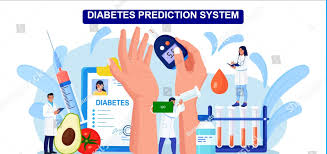      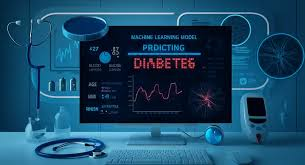

# **Import Libraries:**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# **Read the Dataset:**

In [2]:
df =pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0.0,33.6,0.627,50.0,1
1,1,85,66.0,29,0.0,26.6,0.351,31.0,0
2,8,183,64.0,0,0.0,23.3,0.672,32.0,1
3,1,89,66.0,23,NaN,28.1,0.167,21.0,0
4,0,137,NaN,35,168.0,43.1,2.288,33.0,1


# **Dataset Overview:**

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             766 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   766 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,766.000000,768.000000,766.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.139687,20.536458,79.776762,31.992578,0.471876,33.245111,0.348958
std,3.369578,31.972618,19.352190,15.952218,115.393347,7.884160,0.331329,11.759649,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.500000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,27.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.750000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               766
SkinThickness               768
Insulin                     766
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure               float64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

# **Data Preprocessing and Cleaning:**

**Check the duplicate Values**

In [9]:
duplicate=df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


**Handling Missing Values**

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               2
SkinThickness               0
Insulin                     2
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df= df.dropna(subset=['BloodPressure', 'Insulin'], axis=0)

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Outlier Detection**

<Axes: xlabel='Age'>

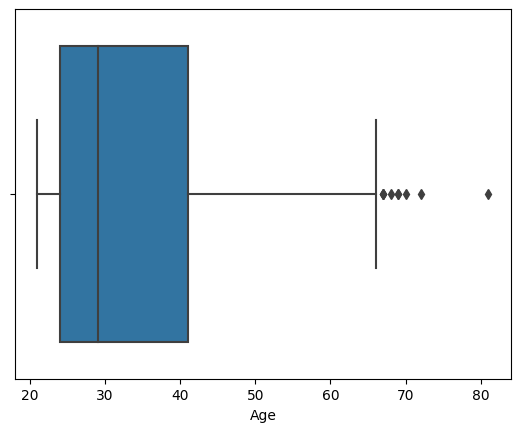

In [14]:
import seaborn as sns
sns.boxplot(x=df['Age'])

<Axes: xlabel='BMI'>

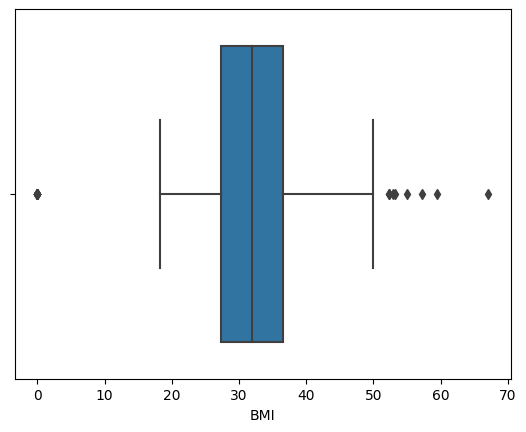

In [15]:
sns.boxplot(x=df['BMI'])

<Axes: xlabel='Insulin'>

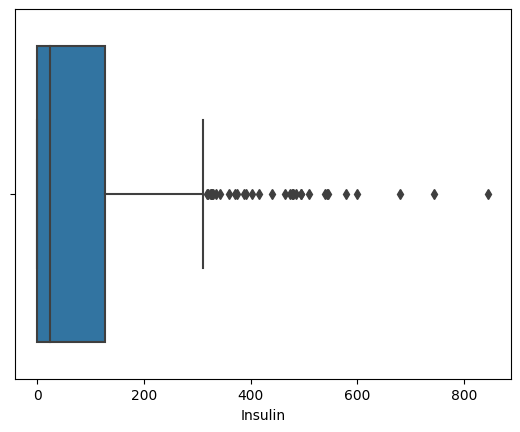

In [16]:
sns.boxplot(x=df['Insulin'])

In [40]:
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
scaler = StandardScaler()
scaler.fit(df[feature_columns])

StandardScaler()

In [42]:
# transforming the data
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Use only those columns
standardized_data = scaler.transform(df[feature_columns])

# standardized_data = scaler.transform(df)
# standardized_data

<Axes: xlabel='Outcome'>

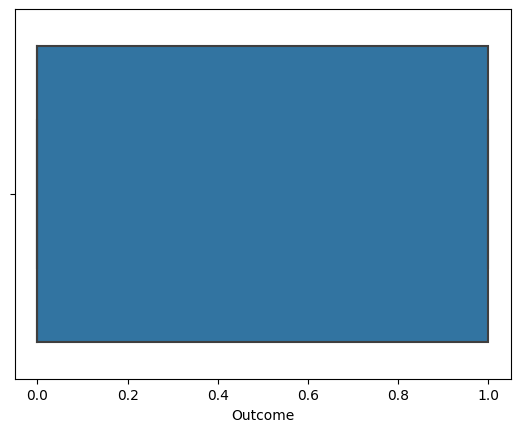

In [43]:
sns.boxplot(x=df['Outcome'])

# **Data Visualization:**

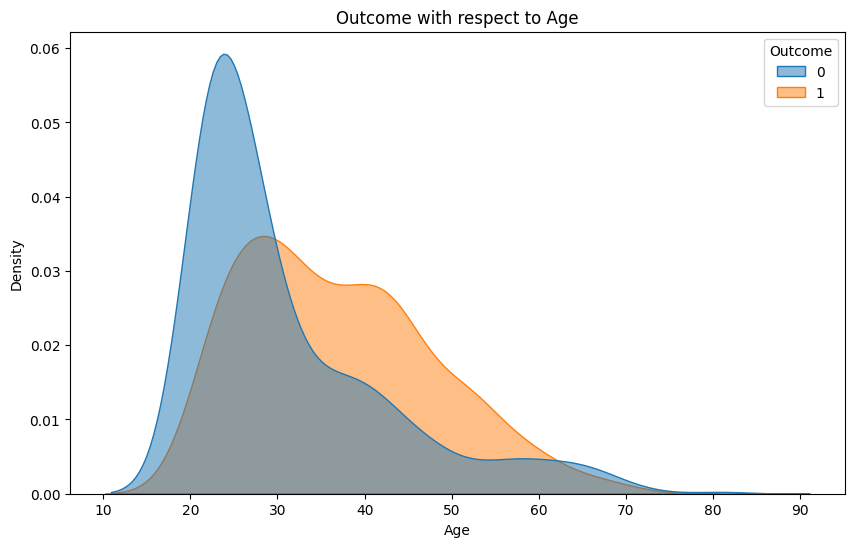

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="Age", hue="Outcome", fill=True, common_norm=False, alpha=0.5)
plt.title("Outcome with respect to Age")
plt.xlabel("Age")
plt.show()

# **Train-Test Split:**

In [46]:
# training and testing the data
X = standardized_data
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2) 

# **Training:**

In [47]:
# training the model
classifier = svm.SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

# **Prediction:**

In [48]:
predicted_y = classifier.predict(X_test)
accuracy = classifier.score(X_test,y_test)
print("SVM accuracy:",accuracy)

SVM accuracy: 0.7777777777777778


# **Evaluation Metrices:**

SVM accuracy: 0.7777777777777778
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       100
           1       0.74      0.55      0.63        53

    accuracy                           0.78       153
   macro avg       0.77      0.72      0.74       153
weighted avg       0.77      0.78      0.77       153



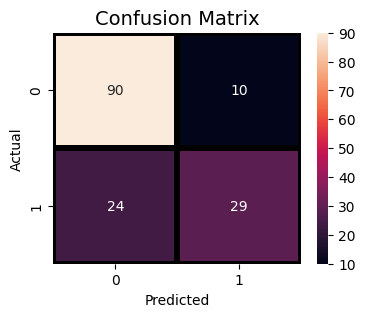

In [49]:
accuracy = classifier.score(X_test,y_test)
print("SVM accuracy:",accuracy)

print(classification_report(y_test, predicted_y))


plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Confusion Matrix",fontsize=14)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# **Save the Model:**

In [53]:
import joblib

joblib.dump(classifier, "SVM_model.pkl")
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

# **Prediction on new data:**

In [55]:
import joblib

# Load model and scaler
model = joblib.load('/kaggle/working/SVM_model.pkl')
scaler = joblib.load('/kaggle/working/scaler.pkl')


# User prediction loop
print("\n--- Diabetes Prediction ---")
while True:
    try:
        print("\nEnter the following details:")
        user_input = [
            float(input("Pregnancies: ")),
            float(input("Glucose: ")),
            float(input("BloodPressure: ")),
            float(input("SkinThickness: ")),
            float(input("Insulin: ")),
            float(input("BMI: ")),
            float(input("DiabetesPedigreeFunction: ")),
            float(input("Age: "))
        ]

        # Scale input
        user_input_scaled = scaler.transform([user_input])

        # Make prediction
        prediction = model.predict(user_input_scaled)
        result = "Diabetic" if prediction[0] == 1 else "Not Diabetic"
        print("Prediction Result:", result)

        # Ask for another prediction
        cont = input("Do you want to make another prediction? (yes/no): ").lower()
        if cont != 'yes':
            print("Exiting prediction loop.")
            break
    except Exception as e:
        print("Error:", e)
        break


--- Diabetes Prediction ---

Enter the following details:


Pregnancies:  3
Glucose:  34
BloodPressure:  90
SkinThickness:  34
Insulin:  0
BMI:  34
DiabetesPedigreeFunction:  2.45
Age:  54


Prediction Result: Not Diabetic


Do you want to make another prediction? (yes/no):  yes



Enter the following details:


Pregnancies:  7
Glucose:  67
BloodPressure:  120
SkinThickness:  56
Insulin:  1
BMI:  3.67
DiabetesPedigreeFunction:  4.87
Age:  81


Prediction Result: Not Diabetic


Do you want to make another prediction? (yes/no):  yes



Enter the following details:


Pregnancies:  6
Glucose:  23
BloodPressure:  90
SkinThickness:  32
Insulin:  0
BMI:  67
DiabetesPedigreeFunction:  2.34
Age:  56


Prediction Result: Not Diabetic


Do you want to make another prediction? (yes/no):  yes



Enter the following details:


Pregnancies:  45
Glucose:  126
BloodPressure:  180
SkinThickness:  45
Insulin:  2
BMI:  87
DiabetesPedigreeFunction:  9.43
Age:  49


Prediction Result: Diabetic


Do you want to make another prediction? (yes/no):  no


Exiting prediction loop.
